In [1]:
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

In [ ]:
df = pd.read_csv('./datasets/BankChurners.csv')

In [ ]:
df = df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1)

In [ ]:
X = df[df["Attrition_Flag"] == "Attrited Customer"].loc[:, ['Customer_Age', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']].copy()

In [5]:
X_scaled = StandardScaler().fit_transform(X)

In [6]:
num_clusters = [i for i in range(2, 10)]

def kmeans_inertia(num_clusters, x_vals):
    inertia = []
    
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42, n_init=10)
        kms.fit(x_vals)
        inertia.append(kms.inertia_)
        
    return inertia


def kmeans_sil(num_clusters, x_vals):
    sil_score = []
    
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42, n_init=10)
        kms.fit(x_vals)
        sil_score.append(silhouette_score(x_vals, kms.labels_))

    return sil_score

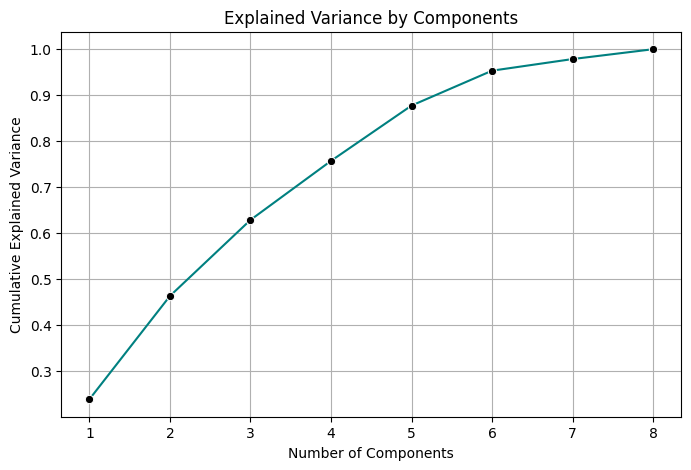

In [7]:
pca = PCA()
pca.fit(X_scaled)


plt.figure(figsize=(8, 5))
num_components = len(pca.explained_variance_ratio_)
sns.lineplot(x=range(1, num_components + 1), y=pca.explained_variance_ratio_.cumsum(), 
             marker='o', color='teal', markerfacecolor='black')
plt.title('Explained Variance by Components')
plt.ylabel('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.xticks(range(1, num_components + 1))
plt.grid(True)
plt.show()

In [17]:
pca = PCA(n_components=2)
pca.fit(X_scaled)
pca.transform(X_scaled)
scores_pca = pca.transform(X_scaled)

In [18]:
inertia = kmeans_inertia(num_clusters, scores_pca)
sil_score = kmeans_sil(num_clusters, scores_pca)

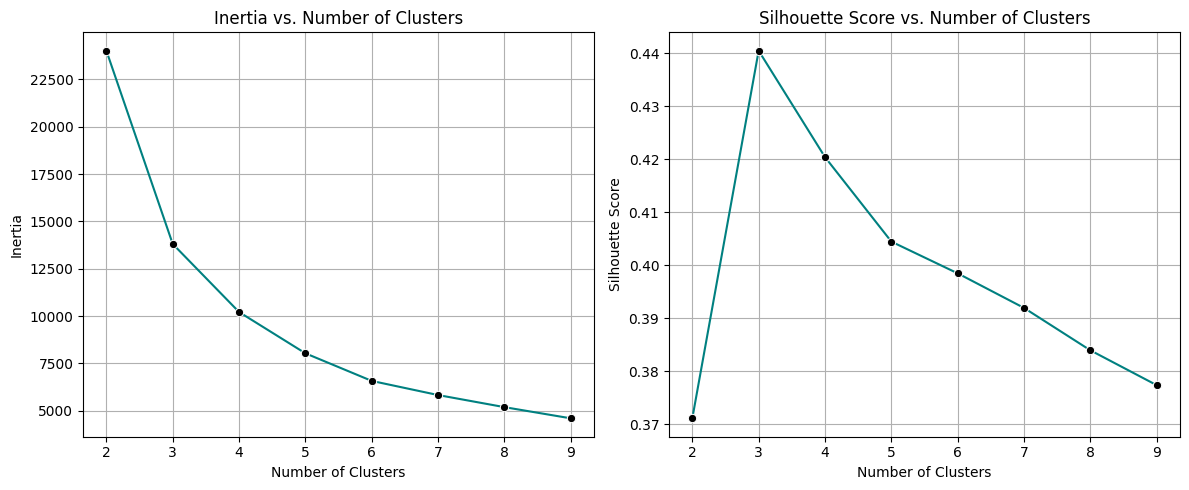

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.lineplot(x=num_clusters, y=inertia, marker='o', ax=ax[0], 
             color='teal', markerfacecolor='black')
ax[0].set_title('Inertia vs. Number of Clusters')
ax[0].set_xlabel('Number of Clusters')
ax[0].set_ylabel('Inertia')
ax[0].grid(True)

sns.lineplot(x=num_clusters, y=sil_score, marker='o', ax=ax[1], 
             color='teal', markerfacecolor='black')
ax[1].set_title('Silhouette Score vs. Number of Clusters')
ax[1].set_xlabel('Number of Clusters')
ax[1].set_ylabel('Silhouette Score')
ax[1].grid(True)

plt.tight_layout()
plt.show()

In [20]:
kmeans_pca = KMeans(n_clusters=4, init='k-means++', n_init=10, random_state=42)
kmeans_pca.fit(scores_pca)

df_pca_kmeans = pd.concat([X.reset_index(drop=True), pd.DataFrame(scores_pca)], axis=1)
df_pca_kmeans.columns.values[-2:] = ['PCA1', 'PCA2']
df_pca_kmeans['Cluster'] = kmeans_pca.labels_

In [21]:
sns.pairplot(df_pca_kmeans, hue="Cluster", palette="mako")

c:\Users\defal\miniconda3\envs\tf\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
